![picture](https://raw.githubusercontent.com/CVilaNet/PCDAyac/main/imgintro.JPG)

## 1. Carga de Datos de Diferentes Origenes

### Cargando la data **CSV** del entorno de ejecución local

In [1]:
#import chardet
#import pandas as pd

#with open('SIRNPD_2021_agosto.csv', 'rb') as f:
#    enc = chardet.detect(f.read())  # or readline if the file is large
    
#data = pd.read_csv('SIRNPD_2021_agosto.csv', encoding = enc['encoding'])
#data.shape

In [2]:
#data.head()

### Cargando la data de **Google Drive**

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import chardet
import pandas as pd

url = "/content/drive/My Drive/Colab Notebooks/PCD/data/"
name = "SIRNPD_2021_agosto.csv"
path = url + name

with open(path, 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large

data = pd.read_csv(path, encoding = enc['encoding'])
data.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (38,39,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(332193, 66)

In [5]:
data.columns

Index(['[Canal tramite]', '[PaisNacimiento]', '[NacDepartamento]',
       '[NacProvincia]', '[NacDistrito]', '[Fecha inscripcion]',
       '[Año inscripcion]', '[Resolución de inscripcion]', '[Mes inscripcion]',
       '[CCDD_ins]', '[CCPP_ins]', '[CCDI_ins]', '[DomDepartamentoIns]',
       '[DomProvinciaIns]', '[DomDistritoIns]', '[GrupoEdad inscripcion]',
       '[LimGravedad inscripcion]', '[GrupoEdad actual]', '[Edad]', '[Genero]',
       '[EstadoCivil]', '[EducaNivelResum actualizacion]', '[CCDD]', '[CCPP]',
       '[CCDI]', '[LimConducta]', '[LimComunicacion]', '[LimCuidado]',
       '[LimLocomocion]', '[LimCorporal]', '[LimDestreza]', '[LimSituacion]',
       '[LimNumero]', '[LimGravedad]', '[DIAG_D_1]', '[DIAG_D_2]',
       '[DIAG_D_3]', '[DIAG_D_4]', '[DIAG_D_5]', '[DIAG_D_6]', '[DIAG_E_1]',
       '[DIAG_E_2]', '[DIAG_E_3]', '[DIAG_E_4]', '[DIAG_E_5]', '[DIAG_E_6]',
       '[def_intelectual]', '[def_psicologica]', '[def_lenguaje]',
       '[def_audicion]', '[def_vision]', '[d

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/CVilaNet/PCDAyac/main/Data/"
name = "IDH2017Regional.xlsx"
path = url + name

dataRegiones = pd.read_excel(path)
dataRegiones.shape

(25, 9)

In [7]:
dataRegiones['UBIGEO'] = dataRegiones['UBIGEO'].astype(str)
dataRegiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UBIGEO                 25 non-null     object 
 1   NRO                    25 non-null     int64  
 2   REGION                 25 non-null     object 
 3   HABITANTES             25 non-null     int64  
 4   IDH                    25 non-null     float64
 5   ESPERANZA_VIDA_AÑOS    25 non-null     float64
 6   SEC_COPLETA_18AÑOS     25 non-null     float64
 7   AÑOS_EDUC_25AÑOS       25 non-null     float64
 8   INGRESO_FAM_PERCAPITA  25 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.9+ KB


In [8]:
dataRegiones['UBIGEO'] = dataRegiones['UBIGEO'].apply(lambda x: x if (len(x)==6) else ('0')+x)
#dataRegiones

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/CVilaNet/PCDAyac/main/Data/"
name = "IDH2017Provincia.xlsx"
path = url + name

dataProvicias = pd.read_excel(path)
dataProvicias.shape

(196, 11)

In [10]:
dataProvicias['UBIGEO'] = dataProvicias['UBIGEO'].astype(str)
dataProvicias['UB_REG'] = dataProvicias['UB_REG'].astype(str)
dataProvicias['UB_PROV'] = dataProvicias['UB_PROV'].astype(str)
dataProvicias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UBIGEO                 196 non-null    object 
 1   UB_REG                 196 non-null    object 
 2   UB_PROV                196 non-null    object 
 3   REGION                 196 non-null    object 
 4   PROVINCIA              196 non-null    object 
 5   HABITANTES             196 non-null    int64  
 6   IDH                    196 non-null    float64
 7   ESPERANZA_VIDA_AÑOS    196 non-null    float64
 8   SEC_COPLETA_18AÑOS     196 non-null    float64
 9   AÑOS_EDUC_25AÑOS       196 non-null    float64
 10  INGRESO_FAM_PERCAPITA  196 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 17.0+ KB


In [11]:
dataProvicias['UBIGEO'] = dataProvicias['UBIGEO'].apply(lambda x: x if (len(x)==6) else ('0')+x)
dataProvicias['UB_REG'] = dataProvicias['UB_REG'].apply(lambda x: x if (len(x)==2) else ('0')+x)
dataProvicias['UB_PROV'] = dataProvicias['UB_PROV'].apply(lambda x: x if (len(x)==2) else ('0')+x)

dataProvicias['PROVINCIA'] = dataProvicias['PROVINCIA'].apply(lambda x: str(x).upper())

In [12]:
dataProvicias.head()

,UBIGEO,UB_REG,UB_PROV,REGION,PROVINCIA,HABITANTES,IDH,ESPERANZA_VIDA_AÑOS,SEC_COPLETA_18AÑOS,AÑOS_EDUC_25AÑOS,INGRESO_FAM_PERCAPITA
0,010100,01,01,AMAZONAS,CHACHAPOYAS,55506,0.517913,74.439914,62.945571,7.841138,838.090033
1,010200,01,02,AMAZONAS,BAGUA,74100,0.445896,77.166568,47.662957,6.662616,657.149216
2,010300,01,03,AMAZONAS,BONGARA,25637,0.396842,72.787943,42.407025,5.781755,595.906249
3,010400,01,04,AMAZONAS,CONDORCANQUI,42470,0.246730,67.501299,26.995179,5.292698,237.839643
4,010500,01,05,AMAZONAS,LUYA,44436,0.337653,74.496166,35.243641,4.851856,452.954370


### Procesando y Depurando la data

In [13]:
dataPCD = data.copy(deep=True)

In [14]:
dataPCD.rename(columns = {'[DomDepartamentoIns]':'DomDepa', '[DomProvinciaIns]':'DomProv', 
                          '[DomDistritoIns]':'DomDist',  '[Año inscripcion]':'AñoInsc', '[Fecha inscripcion]':'FechaInsc',
                          '[Edad]':'Edad', '[Genero]':'Genero', '[EducaNivelResum actualizacion]':'EducaNivel',
                          '[Estado Registro]':'EstadoReg', '[LimGravedad]':'LimGravedad', 
                          '[def_intelectual]':'def_intelectual', '[def_psicologica]':'def_psicologica', 
                          '[def_lenguaje]':'def_lenguaje', '[def_audicion]':'def_audicion', '[def_vision]':'def_vision', 
                          '[def_viscerales]':'def_viscerales', '[def_musculo]':'def_musculo', '[def_generalizadas]':'def_generalizadas'}, inplace = True)

In [15]:
columns_data = ['DomDepa', 'DomProv', 'DomDist', 'AñoInsc', 'FechaInsc', 'Edad', 'Genero', 'EducaNivel','EstadoReg', 'LimGravedad', 
                'def_intelectual', 'def_psicologica', 'def_lenguaje', 'def_audicion', 
                'def_vision', 'def_viscerales', 'def_musculo', 'def_generalizadas']
dataPCD[columns_data].head()

,DomDepa,DomProv,DomDist,AñoInsc,FechaInsc,Edad,Genero,EducaNivel,EstadoReg,LimGravedad,def_intelectual,def_psicologica,def_lenguaje,def_audicion,def_vision,def_viscerales,def_musculo,def_generalizadas
0,CALLAO,CALLAO,CALLAO,2000,2000-08-10,57,M,6,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,LIMA,LIMA,MIRAFLORES,2000,2000-03-06,84,M,6,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AREQUIPA,AREQUIPA,CHARACATO,2000,2000-12-18,66,M,6,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIMA,LIMA,SAN MIGUEL,2000,2000-03-16,39,M,0,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2001,2001-01-01,80,F,2,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
dataPCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332193 entries, 0 to 332192
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   [Canal tramite]              332193 non-null  int64  
 1   [PaisNacimiento]             332193 non-null  object 
 2   [NacDepartamento]            332193 non-null  object 
 3   [NacProvincia]               332193 non-null  object 
 4   [NacDistrito]                332193 non-null  object 
 5   FechaInsc                    332193 non-null  object 
 6   AñoInsc                      332193 non-null  int64  
 7   [Resolución de inscripcion]  332193 non-null  int64  
 8   [Mes inscripcion]            332193 non-null  int64  
 9   [CCDD_ins]                   332193 non-null  int64  
 10  [CCPP_ins]                   332193 non-null  int64  
 11  [CCDI_ins]                   332193 non-null  int64  
 12  DomDepa                      332193 non-null  object 
 13 

In [17]:
condicionFisica = "((def_lenguaje==1.0) | (def_audicion==1.0) | (def_vision==1.0) | (def_viscerales==1.0) | (def_musculo==1.0) | (def_generalizadas==1.0))"
dataPCDFisica = dataPCD.query(condicionFisica)

condicionIntelectual = "((def_intelectual==1.0) | (def_psicologica==1.0))"
dataPCDIntelectual = dataPCD.query(condicionIntelectual)

condicionFisicaIntelectual = condicionFisica + "&" + condicionIntelectual
dataPCDFisicaIntelectual = dataPCD.query(condicionFisicaIntelectual)

condicionPCDGeneral = condicionFisica + "|" + condicionIntelectual
dataPCDGeneral = dataPCD.query(condicionPCDGeneral)

print('Reg. Data Total: ' + str(dataPCD.shape))
print('Reg. PCD General: ' + str(dataPCDGeneral.shape))
print('Reg. Disc. Fisica: ' + str(dataPCDFisica.shape))
print('Reg. Disc. Intelectual: ' + str(dataPCDIntelectual.shape))
print('Reg. Disc. Fisica e Intelectual: ' + str(dataPCDFisicaIntelectual.shape))

Reg. Data Total: (332193, 66)
Reg. PCD General: (332036, 66)
Reg. Disc. Fisica: (267885, 66)
Reg. Disc. Intelectual: (121605, 66)
Reg. Disc. Fisica e Intelectual: (57454, 66)


## 2. Análisis por **Edad** de PCDs **Hombres Vs Mujeres**

### 2.1. Análisis Gráfico General entre PCDs por Sexo

In [18]:
dataEdad = pd.crosstab(dataPCDGeneral.Edad, dataPCDGeneral.Genero)

In [19]:
dataEdad.head()

Genero,F,M
Edad,,
0,5,7
1,63,92
2,178,221
3,374,475
4,597,768


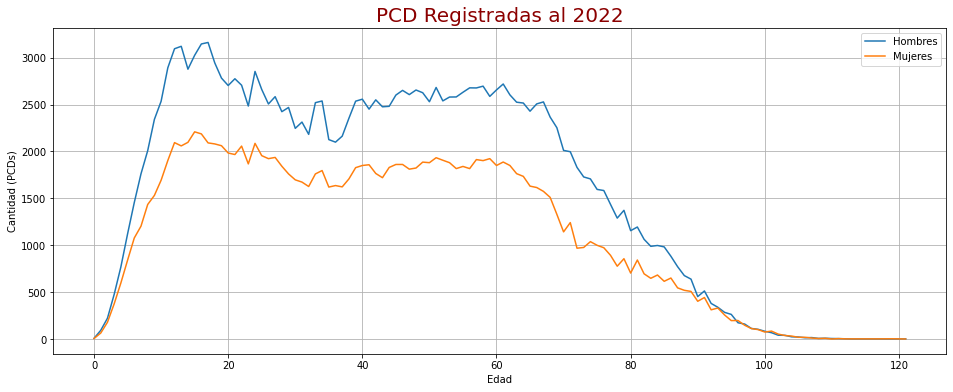

In [20]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

# Re-sizing plot area
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)

# Adding a title and axis text
plt.title("PCD Registradas al 2022", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("Edad")
plt.ylabel("Cantidad (PCDs)")

plt.plot(dataEdad.index.tolist(), dataEdad.M.tolist(), label='Hombres')
plt.plot(dataEdad.index.tolist(), dataEdad.F.tolist(), label='Mujeres')

# add a legend (automatically)
plt.legend()

# adding grid
plt.grid(True)

# display
plt.show()

### 2.2. Análisis Gráfico General de PCDs por Tipo de Discapacidad y por Sexo

In [21]:
# Considerando que en el array llegan valores bien definidos -> 0:NO presenta discapacidad - 1:SI presenta discapacidad
def get_condicion(items):
  acumulador = 0
  for item in items:
    acumulador = acumulador + item
  
  resultado = 0 if acumulador == 0 else 1
  return resultado

print(get_condicion([1,0,0]))

1


In [22]:
dataPCDGeneral[columns_data].fillna(0, inplace=True)

dataPCDGeneral['dis_fisica'] = dataPCDGeneral.apply(lambda x: get_condicion([x.def_lenguaje, x.def_audicion, x.def_vision, x.def_viscerales, x.def_musculo, x.def_generalizadas]), axis=1)
dataPCDGeneral['dis_intelectual'] = dataPCDGeneral.apply(lambda x: get_condicion([x.def_intelectual, x.def_psicologica]), axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-22-088c7aa08f41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPCDGeneral['dis_fisica'] = dataPCDGeneral.apply(lambda x: get_condicion([x.def_lenguaje, x.def_audicion, x.def_vision, x.def_viscerales, x.def_musculo, x.def_generalizadas]), axis=1)
<ipython-input-22-088c7aa08f41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [23]:
columns_data.append('dis_fisica')
columns_data.append('dis_intelectual')
#dataPCDGeneral[columns_data].head()

In [24]:
# Tipifica la discapacidad -> F:Fisica - I:Intelectual - FI: Fisica e Intelectual - N:Ninguna discapacidad
def get_tipo(fisica, intelectual):
  resultado = 'N' 
  
  if ((fisica==1) & (intelectual==1)):
    resultado = 'FI'
  elif (fisica==1):
    resultado = 'F'
  elif (intelectual==1):
    resultado = 'I'

  return resultado

print(get_tipo(1, 1))

FI


In [25]:
dataPCDGeneral['dis_tipo'] = dataPCDGeneral.apply(lambda x: get_tipo(x.dis_fisica, x.dis_intelectual), axis=1)

<ipython-input-25-2dc18eeaa48d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPCDGeneral['dis_tipo'] = dataPCDGeneral.apply(lambda x: get_tipo(x.dis_fisica, x.dis_intelectual), axis=1)


In [26]:
columns_data.append('dis_tipo')
dataPCDGeneral[columns_data].head()

,DomDepa,DomProv,DomDist,AñoInsc,FechaInsc,Edad,Genero,EducaNivel,EstadoReg,LimGravedad,...,def_psicologica,def_lenguaje,def_audicion,def_vision,def_viscerales,def_musculo,def_generalizadas,dis_fisica,dis_intelectual,dis_tipo
0,CALLAO,CALLAO,CALLAO,2000,2000-08-10,57,M,6,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,F
4,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2001,2001-01-01,80,F,2,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,F
5,LIMA,LIMA,BREÑA,2001,2001-01-01,58,M,3,1,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,F
6,PASCO,OXAPAMPA,VILLA RICA,2001,2001-01-01,50,M,3,1,3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,F
7,LIMA,LIMA,RÍMAC,2001,2001-01-06,62,F,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,FI


In [27]:
dataDisFisica = dataPCDGeneral.query("(dis_tipo == 'F')")
dataDisIntelectual = dataPCDGeneral.query("(dis_tipo == 'I')")
dataDisFisicaIntelectual = dataPCDGeneral.query("(dis_tipo == 'FI')")

dataDisFisica = pd.crosstab(dataDisFisica.Edad, dataDisFisica.Genero)
dataDisIntelectual = pd.crosstab(dataDisIntelectual.Edad, dataDisIntelectual.Genero)
dataDisFisicaIntelectual = pd.crosstab(dataDisFisicaIntelectual.Edad, dataDisFisicaIntelectual.Genero)

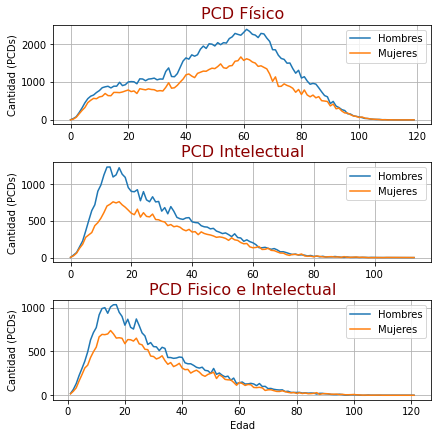

In [28]:
import matplotlib.pyplot as plt

font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Re-sizing plot area
f = plt.figure()
#f.set_figwidth(16)
f.set_figheight(6)

plt.subplot(3,1,1)
plt.plot(dataDisFisica.index.tolist(), dataDisFisica.M.tolist(), label='Hombres')
plt.plot(dataDisFisica.index.tolist(), dataDisFisica.F.tolist(), label='Mujeres')
plt.legend()
plt.grid(True)
plt.title('PCD Físico', fontdict=font)
plt.ylabel("Cantidad (PCDs)")

plt.subplot(3,1,2)
plt.plot(dataDisIntelectual.index.tolist(), dataDisIntelectual.M.tolist(), label='Hombres')
plt.plot(dataDisIntelectual.index.tolist(), dataDisIntelectual.F.tolist(), label='Mujeres')
plt.legend()
plt.grid(True)
plt.title('PCD Intelectual', fontdict=font)
plt.ylabel("Cantidad (PCDs)")

plt.subplot(3, 1, 3)
plt.plot(dataDisFisicaIntelectual.index.tolist(), dataDisFisicaIntelectual.M.tolist(), label='Hombres')
plt.plot(dataDisFisicaIntelectual.index.tolist(), dataDisFisicaIntelectual.F.tolist(), label='Mujeres')
plt.legend()
plt.grid(True)
plt.title('PCD Fisico e Intelectual', fontdict=font)
plt.ylabel("Cantidad (PCDs)")
plt.xlabel("Edad")

plt.tight_layout(pad=0.4, w_pad=1, h_pad=0.3) # UPDATE 3: set space manually

plt.show()

## 3. Análisis por **Edad** y **Tipo de Discapacidad**

In [29]:
dataDiscapacidad = pd.crosstab(dataPCDGeneral.Edad, dataPCDGeneral.dis_tipo)
dataDiscapacidad.head()

dis_tipo,F,FI,I
Edad,,,
0,6,0,6
1,59,36,60
2,156,113,130
3,355,218,276
4,567,389,409


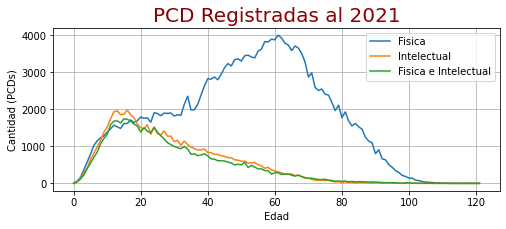

In [30]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

# Re-sizing plot area
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(3)

# Adding a title and axis text
plt.title("PCD Registradas al 2021", fontdict=font) # UPDATE: pass our dict as parameter
plt.xlabel("Edad")
plt.ylabel("Cantidad (PCDs)")

plt.plot(dataDiscapacidad.index.tolist(), dataDiscapacidad.F.tolist(), label='Fisica')
plt.plot(dataDiscapacidad.index.tolist(), dataDiscapacidad.I.tolist(), label='Intelectual')
plt.plot(dataDiscapacidad.index.tolist(), dataDiscapacidad.FI.tolist(), label='Fisica e Intelectual')

# add a legend (automatically)
plt.legend()

# adding grid
plt.grid(True)

# display
plt.show()

## 4. PCDs Inscritas en el **Tiempo 2000 al 2021**

In [31]:
dataPCDGeneral['FechaMY'] = dataPCDGeneral['FechaInsc'].apply(lambda x:x[0:7])
dataPCDTime = pd.crosstab(dataPCDGeneral.FechaMY, dataPCDGeneral.dis_tipo)
dataPCDTime.reset_index(inplace=True)
dataPCDTime.tail()

<ipython-input-31-a8dc1172f49b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPCDGeneral['FechaMY'] = dataPCDGeneral['FechaInsc'].apply(lambda x:x[0:7])


dis_tipo,FechaMY,F,FI,I
239,2021-04,1362,315,396
240,2021-05,1793,465,561
241,2021-06,2312,593,685
242,2021-07,2363,728,738
243,2021-08,2499,683,843


In [32]:
import plotly.express as px

fig = px.line(dataPCDTime, x='FechaMY', y=dataPCDTime.columns, 
              hover_data={'FechaMY':'|%B %d, %Y'}, template = 'plotly_dark',
              title='PCDs Inscritos "2000 al 2021"')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')
fig.show()

## 5. Análisis por **Edad** y **Gravedad**
*   1 = Leve
*   2 = Moderado
*   3 = Severo
*   9 = No especificado

In [33]:
dataPCDGeneral[columns_data].head()

,DomDepa,DomProv,DomDist,AñoInsc,FechaInsc,Edad,Genero,EducaNivel,EstadoReg,LimGravedad,...,def_psicologica,def_lenguaje,def_audicion,def_vision,def_viscerales,def_musculo,def_generalizadas,dis_fisica,dis_intelectual,dis_tipo
0,CALLAO,CALLAO,CALLAO,2000,2000-08-10,57,M,6,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,F
4,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2001,2001-01-01,80,F,2,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,F
5,LIMA,LIMA,BREÑA,2001,2001-01-01,58,M,3,1,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,F
6,PASCO,OXAPAMPA,VILLA RICA,2001,2001-01-01,50,M,3,1,3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,F
7,LIMA,LIMA,RÍMAC,2001,2001-01-06,62,F,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,FI


In [34]:
dataGravedad = pd.crosstab(dataPCDGeneral.Edad, dataPCDGeneral.LimGravedad)
dataGravedad.head()

LimGravedad,1,2,3,9
Edad,,,,
0,2,3,7,0
1,10,24,121,0
2,21,68,310,0
3,43,153,653,0
4,56,228,1081,0


In [35]:
edad = dataGravedad.index.tolist()

dataGravedad.to_dict('dict').keys()
dataGravedad_dic = dataGravedad.to_dict('list')

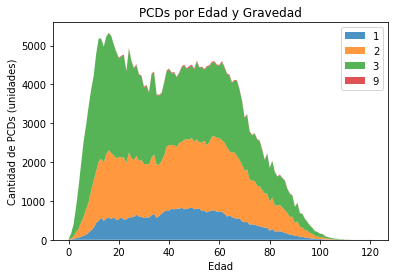

In [36]:
fig, ax = plt.subplots()
ax.stackplot(edad, dataGravedad_dic.values(), labels = dataGravedad.to_dict('dict').keys(), alpha=0.8)

ax.legend(loc='upper right')
ax.set_title('PCDs por Edad y Gravedad')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de PCDs (unidades)')

# 1=Leve, 2=Moderado, 3=Severo, 9=No especificado
plt.show()

## 6. Análisis por **Regiones y Provincias**
Realiza un análisis proporcional en cada una de las regiones según el número de Personas con Discapacidad registradas y la cantidad de habitantes, considerando ademas el Indice de Desarrollo Humano.

### 6.1. Análisis **Geo-Regerenciado** por Región

In [37]:
dataPCDPepa = dataPCDGeneral.groupby(['DomDepa'])['DomDepa'].count()
type(dataPCDPepa)

pandas.core.series.Series

In [38]:
dataPCDPepaDF = dataPCDPepa.to_frame()
type(dataPCDPepaDF)

pandas.core.frame.DataFrame

In [39]:
indicePDC = dataPCDPepaDF.index.tolist()
#indicePDC

In [40]:
itemsPDC = dataPCDPepaDF.values.tolist()
listNumPDC=[]

for itemPDC in itemsPDC:
  listNumPDC.append(itemPDC[0])

#listNumPDC

In [41]:
dataPCDDepaDic = {'REGION':indicePDC, 'numPCD':listNumPDC}
dataPCDDepartamentos = pd.DataFrame.from_dict(dataPCDDepaDic)
dataPCDDepartamentos.head()

,REGION,numPCD
0,AMAZONAS,8938
1,AMERICA,13
2,APURÍMAC,7997
3,AREQUIPA,12646
4,AYACUCHO,8594


In [42]:
dataPCDDepaUbigeo = pd.merge(dataPCDDepartamentos, dataRegiones, on='REGION')

In [43]:
dataPCDDepaUbigeo['ratioPCD'] = (dataPCDDepaUbigeo['numPCD'] / dataPCDDepaUbigeo['HABITANTES']) * 100
dataPCDDepaUbigeo.head()

,REGION,numPCD,UBIGEO,NRO,HABITANTES,IDH,ESPERANZA_VIDA_AÑOS,SEC_COPLETA_18AÑOS,AÑOS_EDUC_25AÑOS,INGRESO_FAM_PERCAPITA,ratioPCD
0,AMAZONAS,8938,010000,1,379384,0.417452,73.306564,46.859333,6.050521,629.7113,2.355924
1,APURÍMAC,7997,030000,3,405759,0.416742,72.634854,65.547677,6.610242,511.8983,1.970874
2,AREQUIPA,12646,040000,4,1382730,0.634479,78.203421,77.801720,10.097563,1088.0636,0.914568
3,AYACUCHO,8594,050000,5,616176,0.409602,71.078435,59.357975,6.905559,512.4642,1.394731
4,CAJAMARCA,16636,060000,6,1341012,0.401060,74.746021,51.376462,5.607542,551.7471,1.240556


In [44]:
import folium

print(folium.__version__)

0.12.1.post1


In [45]:
url_data = 'https://raw.githubusercontent.com/CVilaNet/PCDAyac/main/Data'
region_geo = f'{url_data}/peru_departamental.json'

In [46]:
import folium

folium_map = folium.Map(location=[-9.08528, -78.57833], zoom_start=5, tiles='Stamentoner') #tiles='openstreetmap')

choropleth = folium.Choropleth(
    geo_data=region_geo,
    line_weight=2,
    data=dataPCDDepaUbigeo,
    columns=['UBIGEO', 'ratioPCD'],
    key_on='feature.id',
    fill_color='Reds', # 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='PCD Rate (%)',
    name = 'PCD Mayor Número',
    highlight=True
).add_to(folium_map)

choropleth = folium.Choropleth(
    geo_data=region_geo,
    line_weight=2,
    data=dataPCDDepaUbigeo,
    columns=['UBIGEO', 'IDH'],
    key_on='feature.id',
    fill_color='Greys', # 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='IDH',
    name = 'IDH Alto',
    highlight=True
).add_to(folium_map)

folium.LayerControl(collapsed=False).add_to(folium_map)

folium_map

### 6.2. Análisis Gráfico por Gravedad y Provincia

In [55]:
dataPCDProvGravedad = dataPCDGeneral.groupby(['DomDepa', 'DomProv', 'LimGravedad']).agg({'DomProv':['count']})
dataPCDProvGravedad.columns = ['numPCD']
dataPCDProvGravedad = dataPCDProvGravedad.reset_index()
dataPCDProvGravedad.shape

(721, 4)

In [56]:
dataPCDProvGravedadUbigeo = pd.merge(dataPCDProvGravedad, dataProvicias, how='left', left_on=['DomDepa', 'DomProv'], right_on=['REGION', 'PROVINCIA'])

# Eliminando los valores NaN
dataPCDProvGravedadUbigeo[dataPCDProvGravedadUbigeo['UBIGEO'].isna()].shape

# Eliminando las filas con valores NaN
dataPCDProvGravedadUbigeo.dropna(subset=['UBIGEO'], inplace=True)

# Eliminando las columans duplicadas producto del merge
dataPCDProvGravedadUbigeo.drop(['DomDepa', 'DomProv'], axis=1, inplace=True)

# Hallando el ratio de PCDs por numero de habitantes de cada provicia
dataPCDProvGravedadUbigeo['ratioPCD'] = (dataPCDProvGravedadUbigeo['numPCD'] / dataPCDProvGravedadUbigeo['HABITANTES']) * 100

dataPCDProvGravedadUbigeo.shape

In [62]:
dataPCDProvGravedad_1_Ubigeo = dataPCDProvGravedadUbigeo[dataPCDProvGravedadUbigeo['LimGravedad']==1]
dataPCDProvGravedad_2_Ubigeo = dataPCDProvGravedadUbigeo[dataPCDProvGravedadUbigeo['LimGravedad']==2]
dataPCDProvGravedad_3_Ubigeo = dataPCDProvGravedadUbigeo[dataPCDProvGravedadUbigeo['LimGravedad']==3]

print('Gravedad: Leve (1): ' + str(dataPCDProvGravedad_1_Ubigeo.shape))
print('Gravedad: Moderado (2): ' + str(dataPCDProvGravedad_2_Ubigeo.shape))
print('Gravedad: Severo (3): ' + str(dataPCDProvGravedad_3_Ubigeo.shape))

Gravedad: Leve (1)(194, 14)
Gravedad: Moderado (2)(196, 14)
Gravedad: Severo (3)(196, 14)


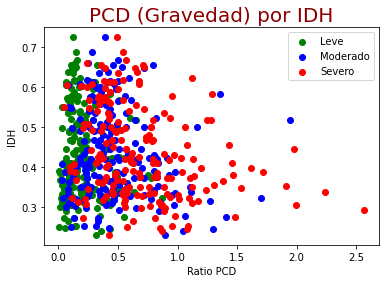

In [68]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title("PCD (Gravedad) por IDH", fontdict=font)
plt.xlabel("Ratio PCD")
plt.ylabel("IDH")

# plot using x, y (coordinates)
plt.scatter(dataPCDProvGravedad_1_Ubigeo['ratioPCD'].values, dataPCDProvGravedad_1_Ubigeo['IDH'].values, label='Leve', color='g')
plt.scatter(dataPCDProvGravedad_2_Ubigeo['ratioPCD'].values, dataPCDProvGravedad_2_Ubigeo['IDH'].values, label='Moderado', color='b')
plt.scatter(dataPCDProvGravedad_3_Ubigeo['ratioPCD'].values, dataPCDProvGravedad_3_Ubigeo['IDH'].values, label='Severo', color='r')

# Adding legends
plt.legend()

plt.show()